# EcoFOCIpy ADCP QC - 23BSP-5A

- mostly remove >500 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [2]:
xdf = xa.load_dataset('23bsp2a_0058m.nc')

In [3]:
len(xdf.depth)

17

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

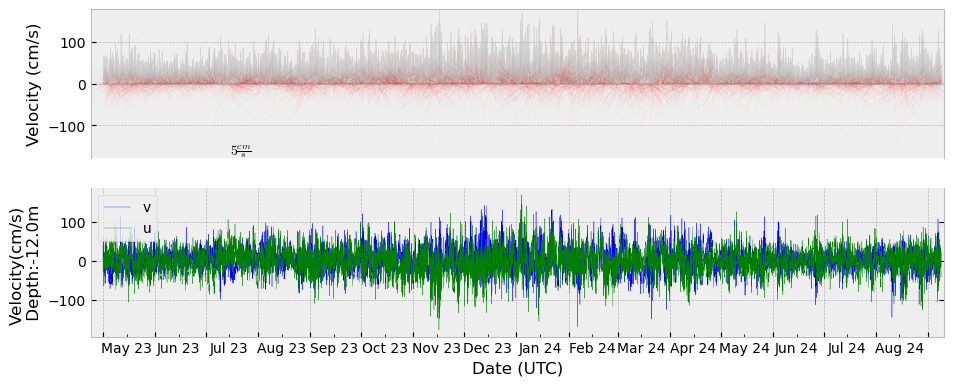

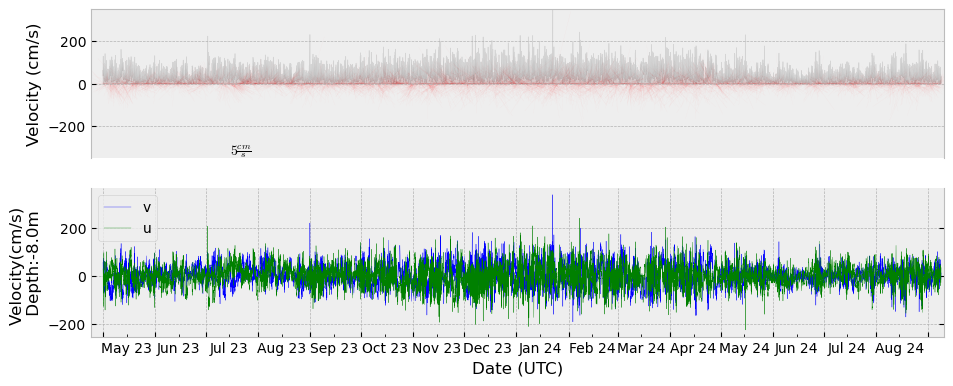

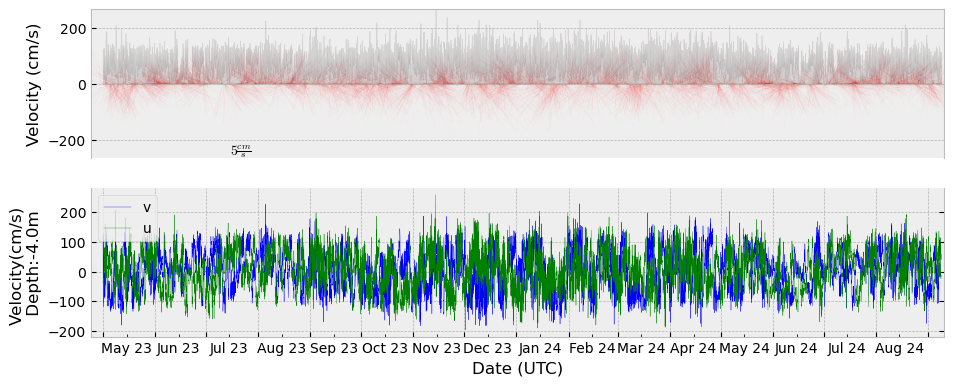

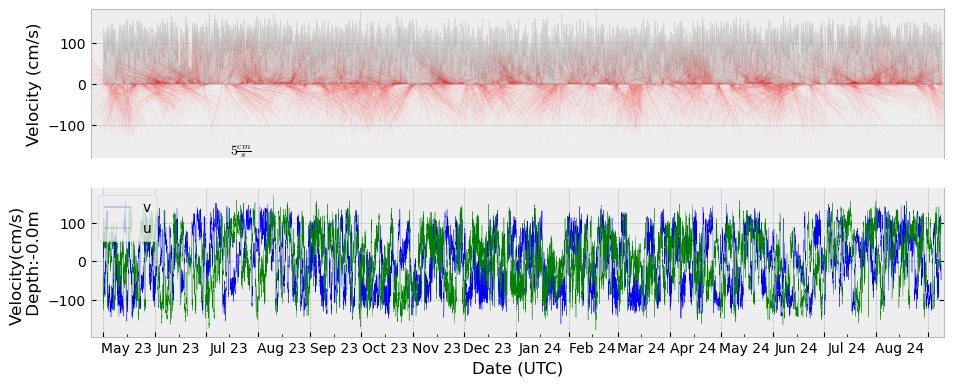

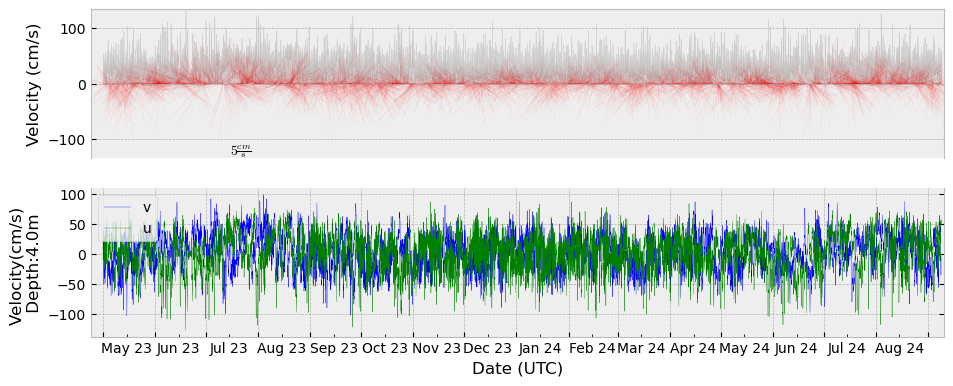

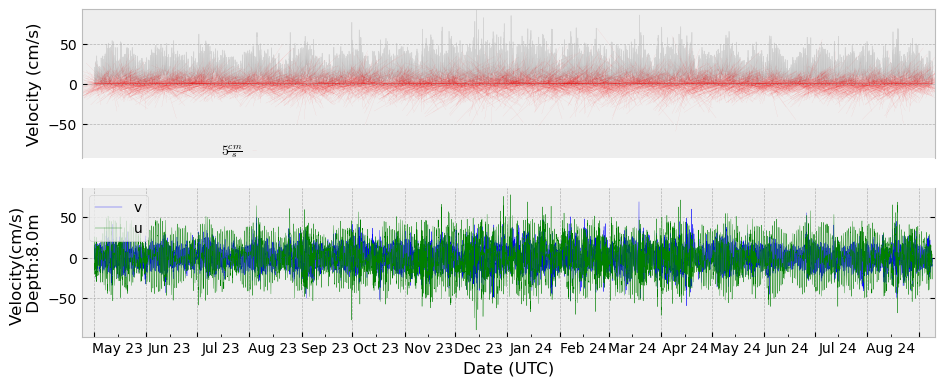

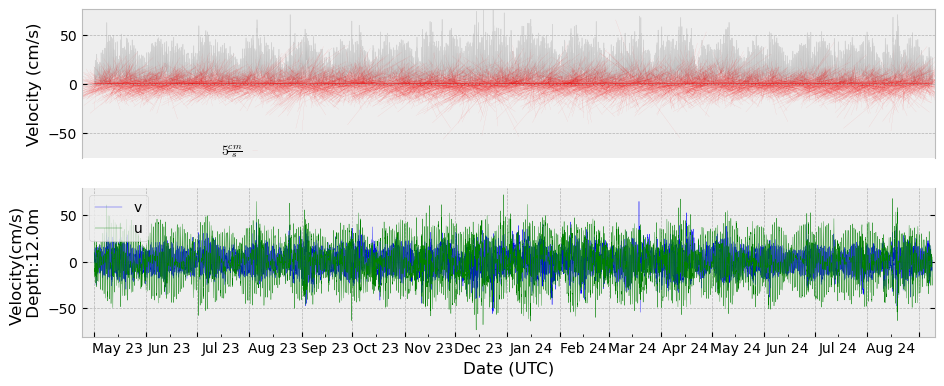

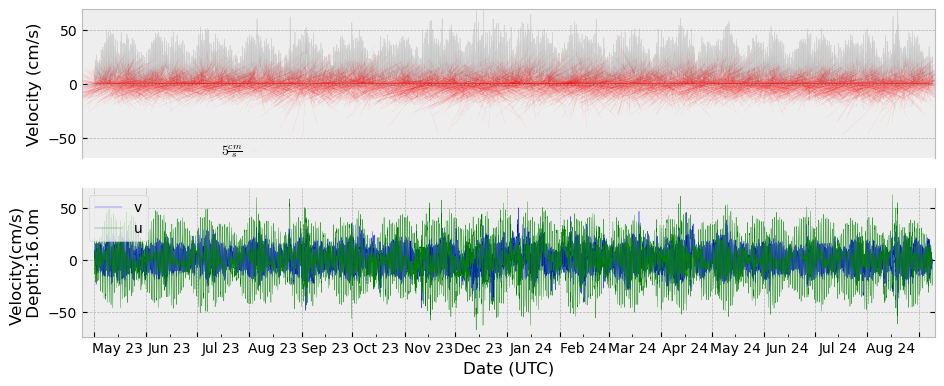

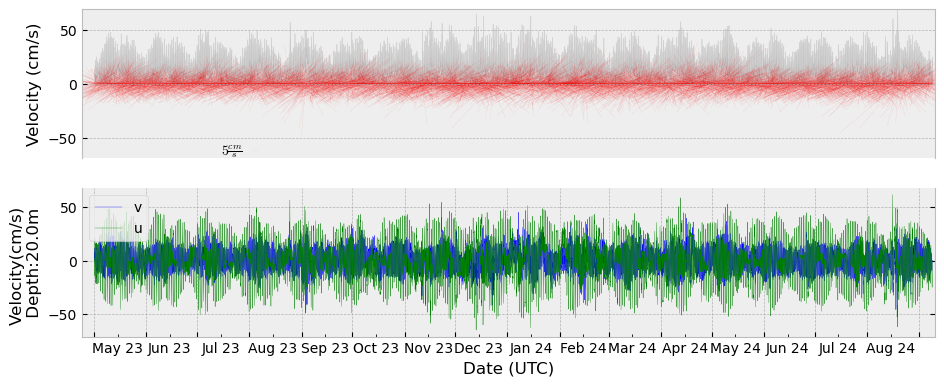

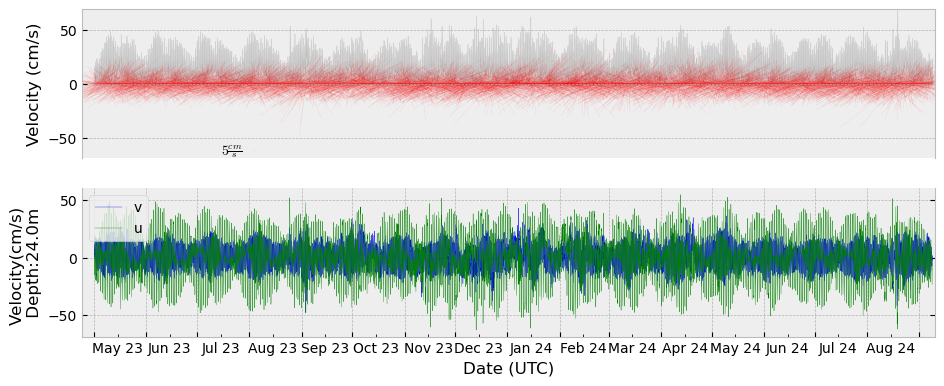

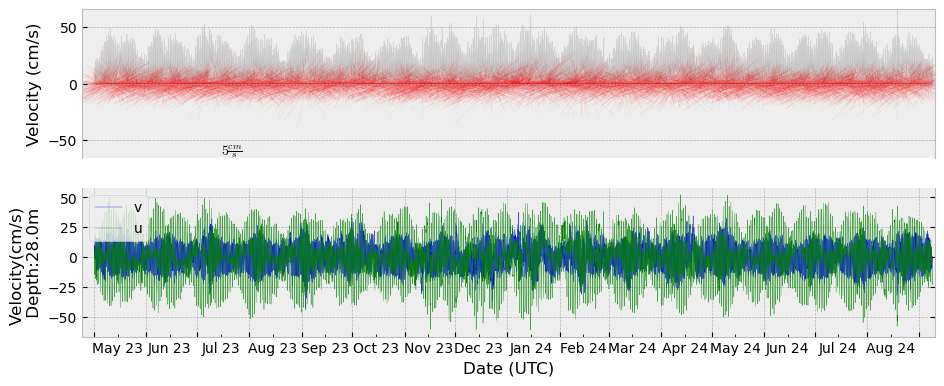

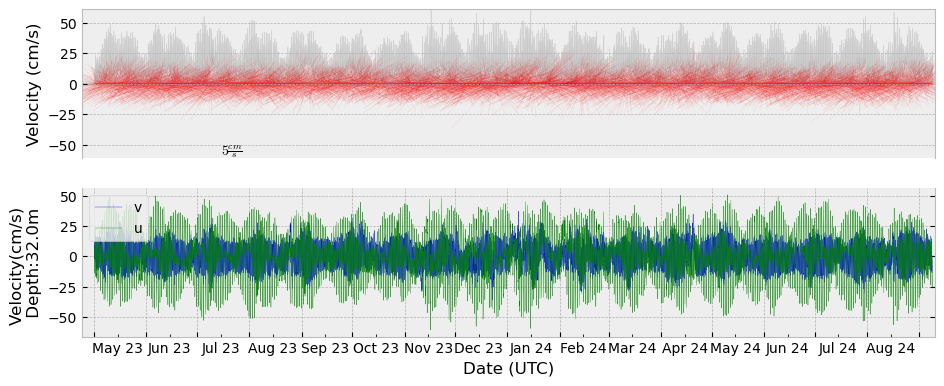

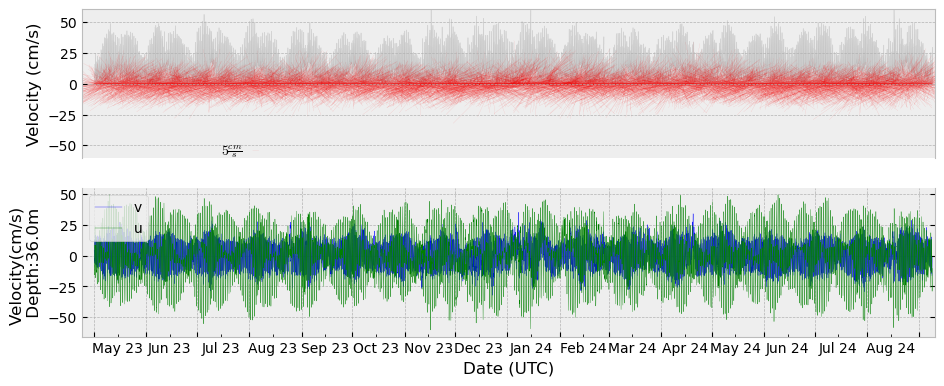

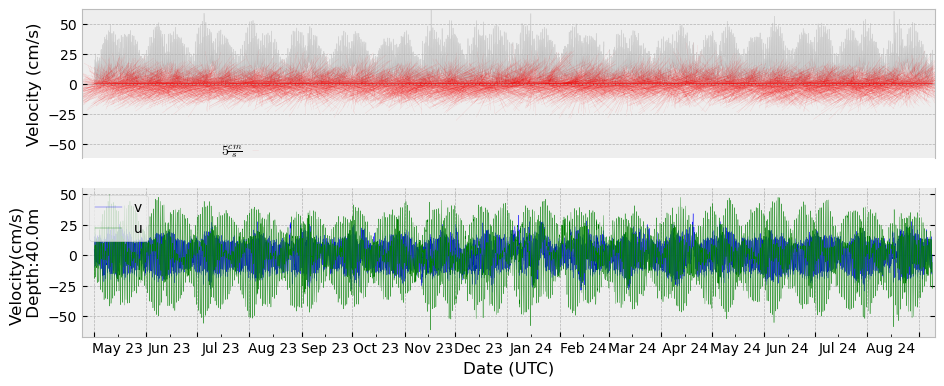

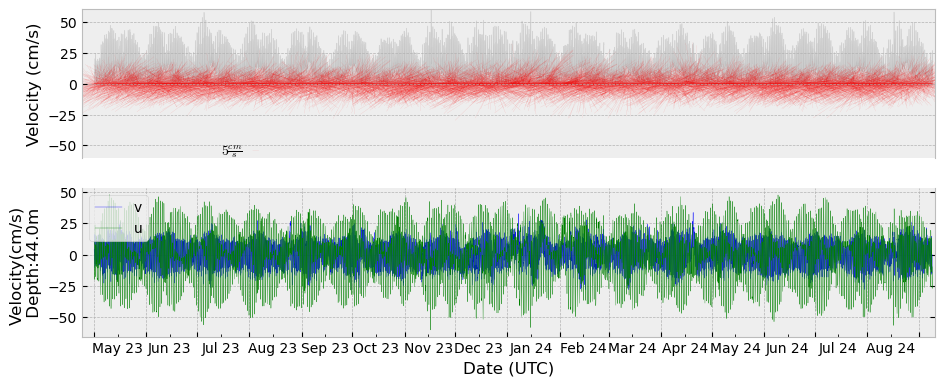

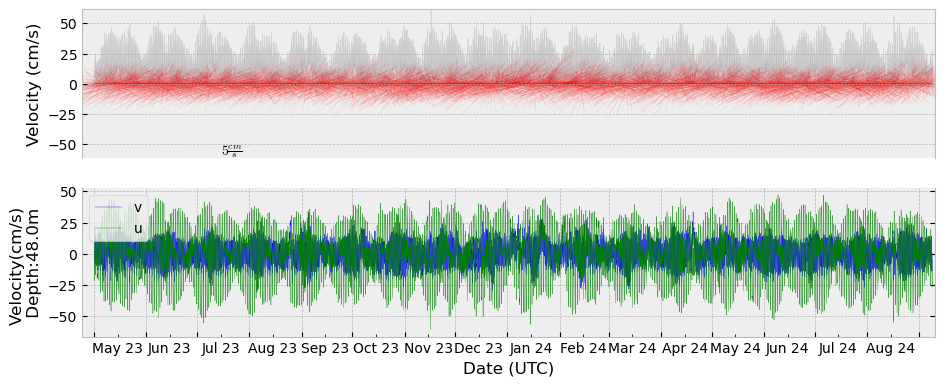

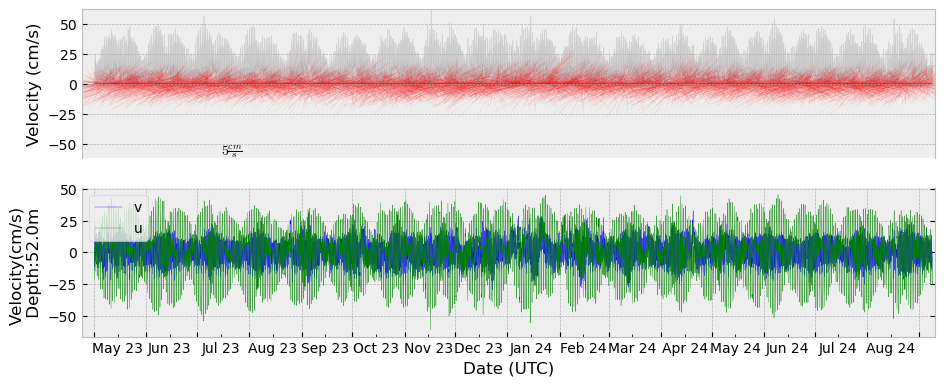

In [6]:
for i in range(0,len(xdf.depth),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

In [7]:
xdf =xdf.where(np.abs(xdf.u_curr_comp) <=500,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 12124, depth: 17)
Coordinates:
  * time             (time) datetime64[ns] 2023-04-24 ... 2024-09-10T03:00:00
  * depth            (depth) float64 -12.0 -8.0 -4.0 -0.0 ... 44.0 48.0 52.0
  * latitude         (latitude) float64 56.87
  * longitude        (longitude) float64 -164.1
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    v_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    w_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    w_curr_comp_err  (latitude, longitude, time, depth) float64 nan nan ... nan
    agc1             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc2             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc3             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc4             (latitude, longitude, time, depth) float64 nan nan ... nan
Attributes:
    Latitude_DegMMddW:                      56 52.08 N
    Longitude_DegMMddN:                     164 4.2 W
    MooringID:                              23BSP-2A
    platform_deployment_date:               2023-05-01T02:22:00Z
    platform_deployment_cruise_name:        DY2306
    platform_recovery_date:                 2024-09-08T15:00:00Z
    platform_recovery_cruise_name:          DY2410
    platform_deployment_recovery_comments:  
    WaterDepth:                             72.0
    date_created:                           2024-10-30T07:41:46Z
    date_modified:                          
    QC_indicator:                           unknown

In [8]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

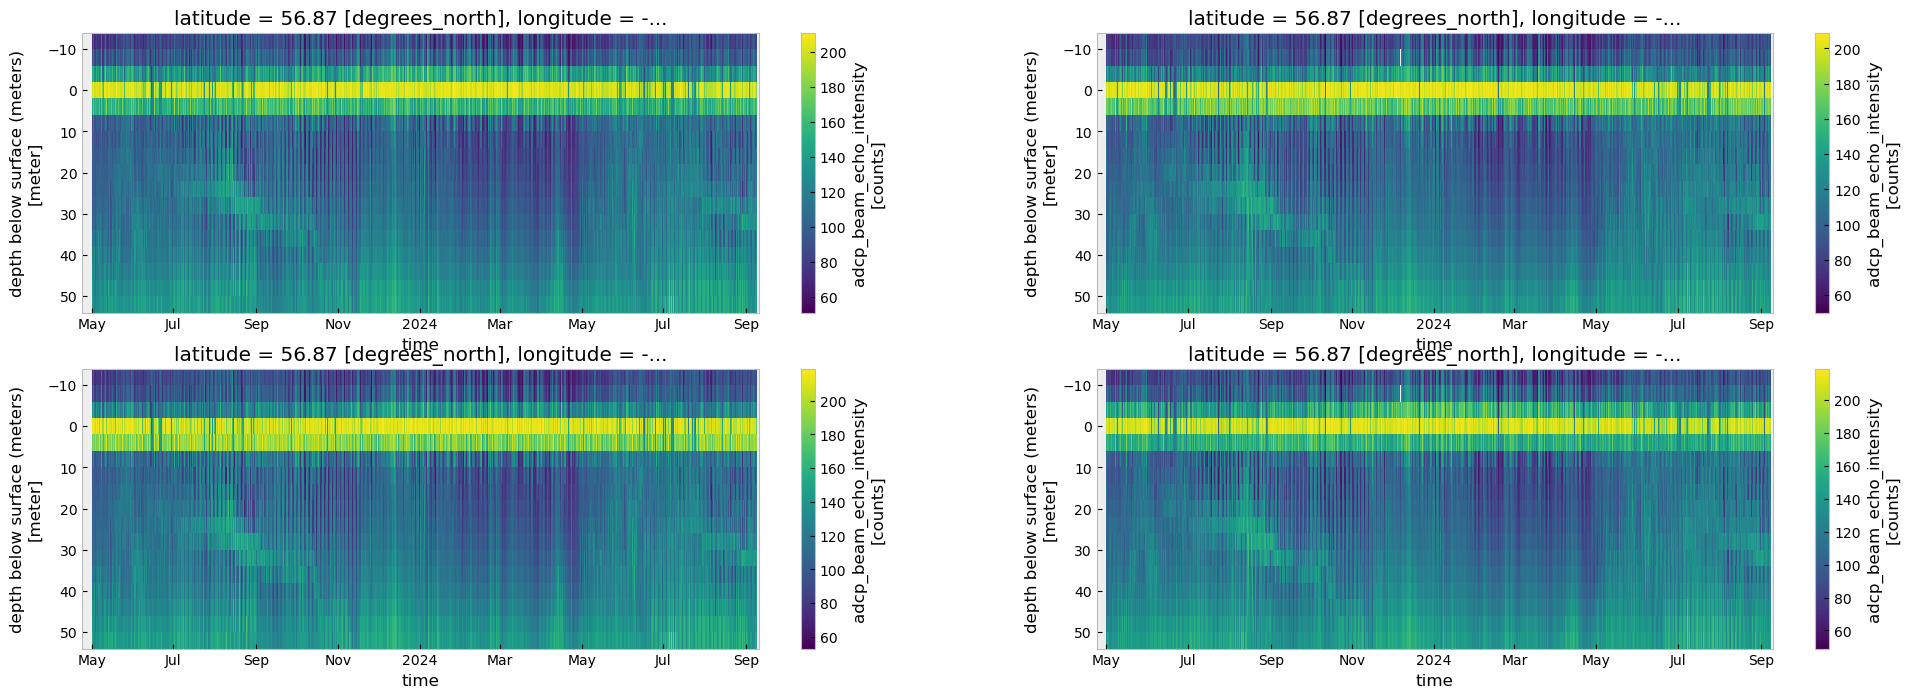

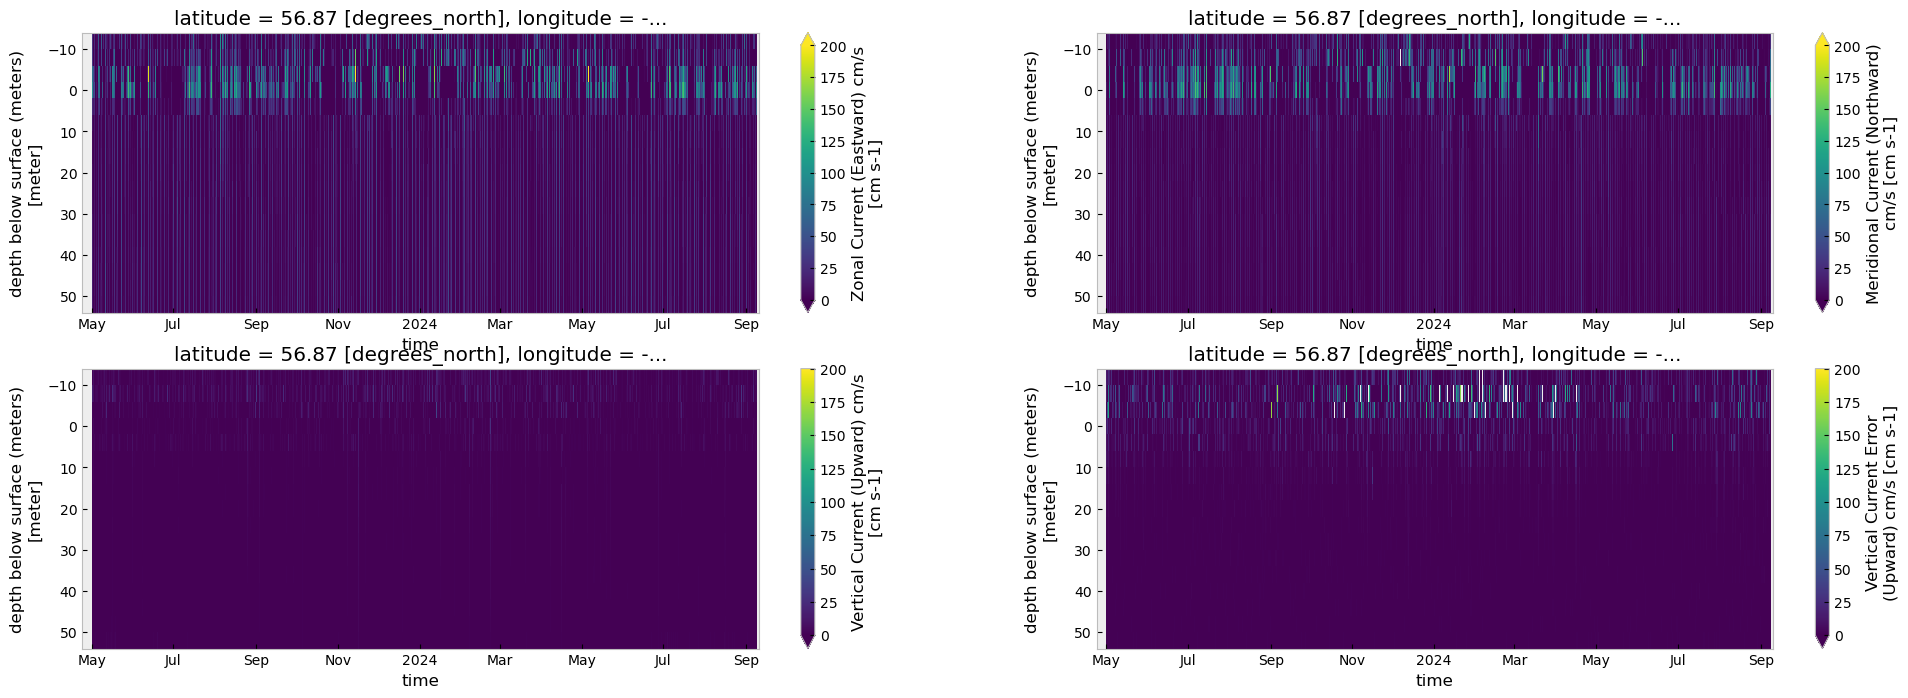

In [9]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [10]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >500cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >500cm/s'    

## Trim above surface (negative values)

In [11]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [12]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [13]:
ixdf.to_netcdf('23bsp2a_0058m.trimmed.nc')

In [14]:
xdf = xa.load_dataset('23bsp2a_0058m.trimmed.nc')

In [15]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2h')

In [16]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [17]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [18]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

## Interpolate over singleton missing gaps linearly

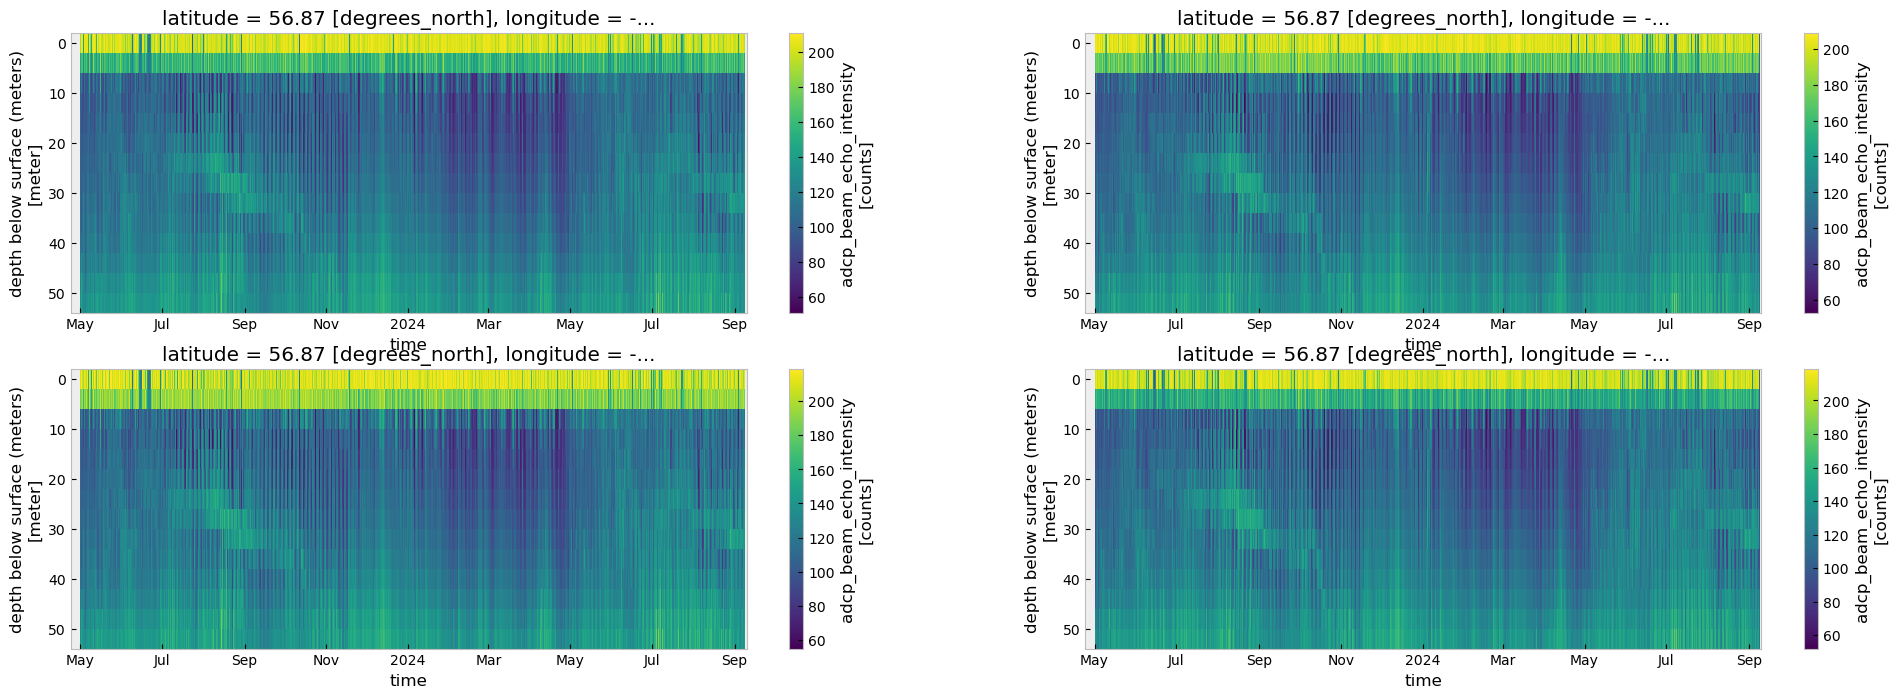

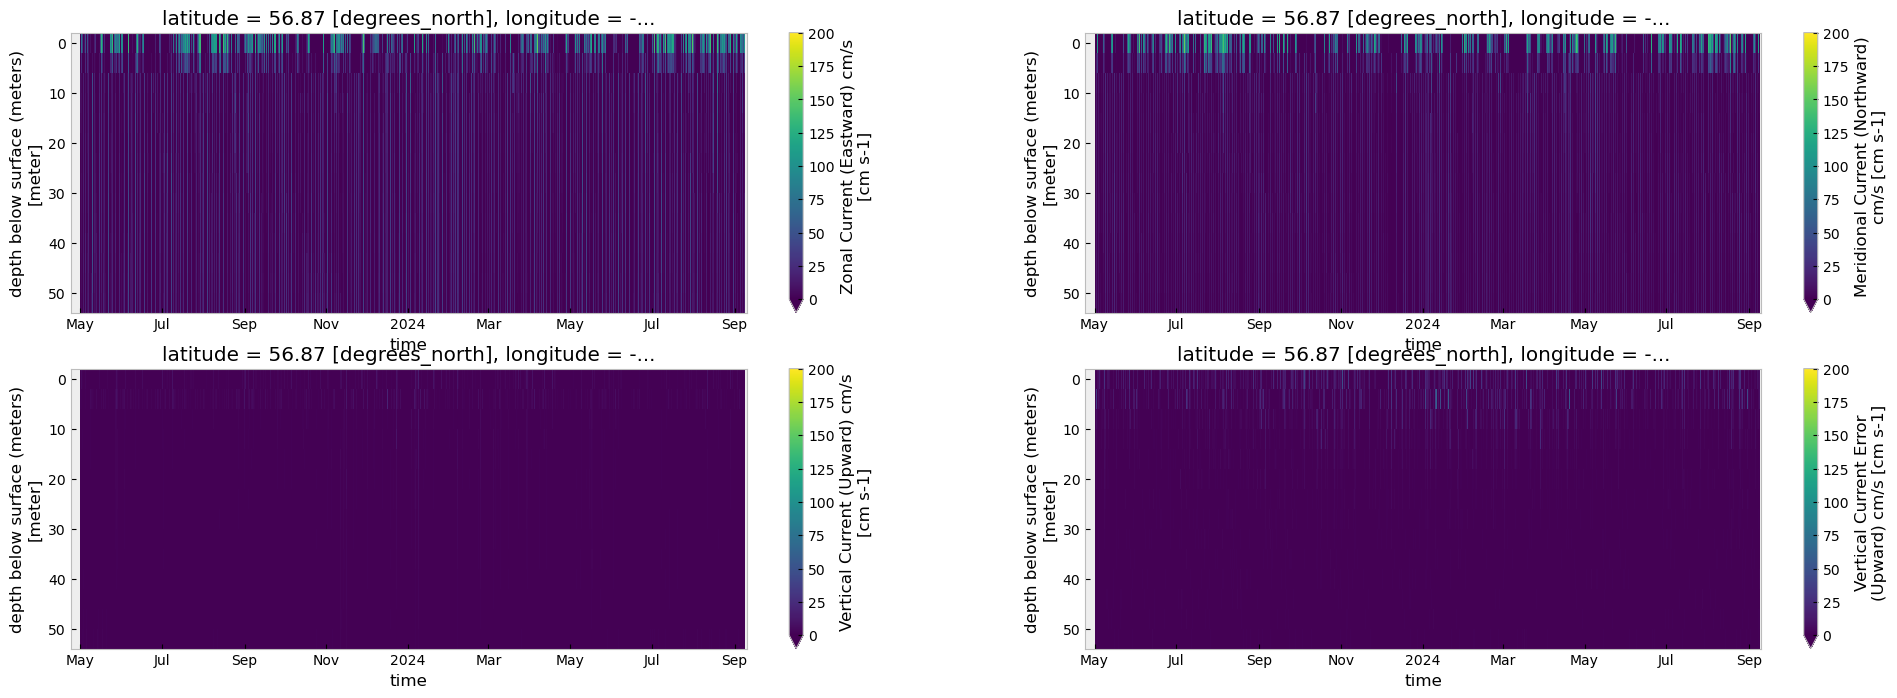

In [19]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [20]:
ixdf.to_netcdf('23bsp2a_0058m.filtered.nc')